# Vještačka inteligencija - Vježbe 13 - Zadaća 5

## Zadatak br. 1

### Implementirati jedan od algoritama koji su se radili na vježbama na određenom skupu podataka po slobodnoj volji, a za cilj da ima predikciju na osnovu korištenih podataka. U samoj implementaciji prikazati rezultate testiranja, kao i podatke o samoj mreži i performansama iskorištenog algoritma.

In [872]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [873]:
df = pd.read_csv('london_weather.csv')

In [874]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [875]:
df.shape

(15341, 10)

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [877]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [878]:
df = df.dropna(axis=0)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14970,20191227,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
14971,20191228,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
14972,20191229,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
14973,20191230,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


In [879]:
df.corr()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,1.000000,-0.094005,-0.013030,-0.044490,0.033502,0.040335,0.043946,0.007478,-0.010149,-0.043168
cloud_cover,-0.094005,1.000000,-0.734598,-0.466202,-0.184016,-0.084180,0.071692,0.229224,-0.237053,-0.001365
sunshine,-0.013030,-0.734598,1.000000,0.851249,0.468120,0.397064,0.222065,-0.226453,0.219350,-0.033778
global_radiation,-0.044490,-0.466202,0.851249,1.000000,0.687035,0.635150,0.479892,-0.157646,0.144784,-0.061488
max_temp,0.033502,-0.184016,0.468120,0.687035,1.000000,0.907365,0.806246,-0.067437,0.099683,-0.130107
mean_temp,0.040335,-0.084180,0.397064,0.635150,0.907365,1.000000,0.955716,-0.007041,0.004609,-0.154469
min_temp,0.043946,0.071692,0.222065,0.479892,0.806246,0.955716,1.000000,0.037195,-0.070920,-0.157537
precipitation,0.007478,0.229224,-0.226453,-0.157646,-0.067437,-0.007041,0.037195,1.000000,-0.347647,-0.002357
pressure,-0.010149,-0.237053,0.219350,0.144784,0.099683,0.004609,-0.070920,-0.347647,1.000000,-0.020581
snow_depth,-0.043168,-0.001365,-0.033778,-0.061488,-0.130107,-0.154469,-0.157537,-0.002357,-0.020581,1.000000


<Axes: >

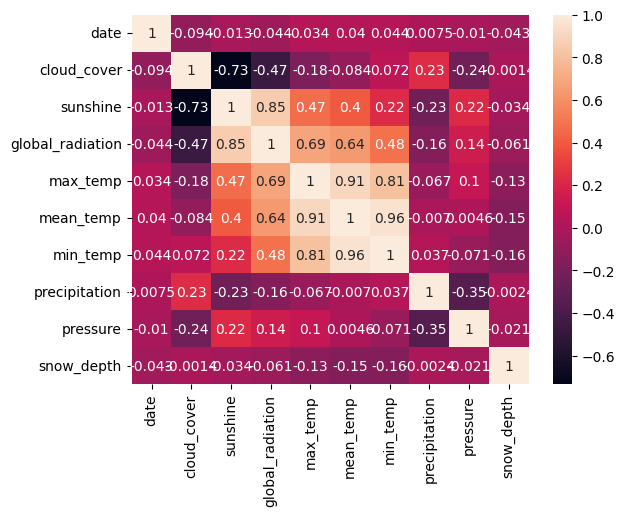

In [880]:
sns.heatmap(df.corr(), annot=True)

In [881]:
X = df[['cloud_cover', 'sunshine', 'global_radiation', 'min_temp', 'precipitation', 'snow_depth', 'pressure']].values.astype(float)
X

array([[2.0000e+00, 7.0000e+00, 5.2000e+01, ..., 4.0000e-01, 9.0000e+00,
        1.0190e+05],
       [6.0000e+00, 1.7000e+00, 2.7000e+01, ..., 0.0000e+00, 8.0000e+00,
        1.0253e+05],
       [5.0000e+00, 0.0000e+00, 1.3000e+01, ..., 0.0000e+00, 4.0000e+00,
        1.0205e+05],
       ...,
       [6.0000e+00, 2.2000e+00, 2.9000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0336e+05],
       [0.0000e+00, 3.6000e+00, 3.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0297e+05],
       [7.0000e+00, 0.0000e+00, 1.3000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0316e+05]])

In [882]:
y = df[['precipitation']].values.astype(float)
y

array([[0.4],
       [0. ],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [883]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [884]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)

(11074, 7) (11074, 1)


In [885]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [886]:
def prepare_data(x, y, n_steps):
    X_seq, Y_seq = [], []
    for i in range(len(x) - n_steps):
        seq_x = x[i:i+n_steps, :]
        seq_y = y[i+n_steps]
        X_seq.append(seq_x)
        Y_seq.append(seq_y)
    return np.array(X_seq), np.array(Y_seq)

In [887]:
n_steps = 10
n_features = X.shape[1]
print(n_features)

7


In [888]:
model = Sequential()
model.add(Input(shape=(n_features)))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mae', metrics=['accuracy'])

In [889]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.5235 - val_loss: 0.4695 - val_accuracy: 0.4171
Epoch 2/50
347/347 [==============================] - 1s 2ms/step - loss: 0.1181 - accuracy: 0.5293 - val_loss: 0.3012 - val_accuracy: 0.4489
Epoch 3/50
347/347 [==============================] - 1s 1ms/step - loss: 0.0995 - accuracy: 0.5310 - val_loss: 0.2943 - val_accuracy: 0.5283
Epoch 4/50
347/347 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.5312 - val_loss: 0.2141 - val_accuracy: 0.5309
Epoch 5/50
347/347 [==============================] - 1s 1ms/step - loss: 0.0820 - accuracy: 0.5309 - val_loss: 0.0979 - val_accuracy: 0.5341
Epoch 6/50
347/347 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.5312 - val_loss: 0.1398 - val_accuracy: 0.5320
Epoch 7/50
347/347 [==============================] - 1s 1ms/step - loss: 0.0752 - accuracy: 0.5314 - val_loss: 0.2759 - val_accuracy: 0.5341
Epoch 

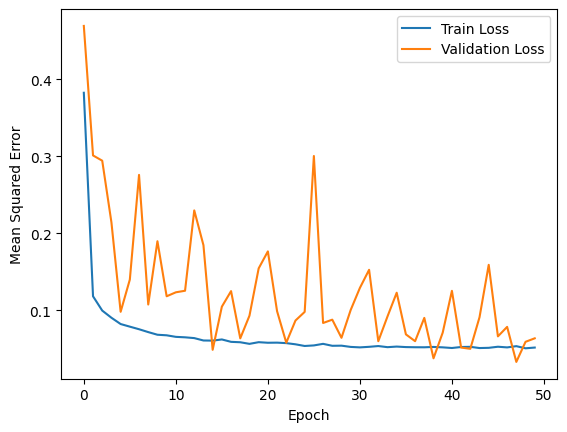

In [890]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [891]:
y_pred = model.predict(X_test)
print(y_pred)

87/87 [==============================] - 0s 1ms/step
[[-0.07452986]
 [ 0.1446965 ]
 [ 3.7087197 ]
 ...
 [-0.01126501]
 [-0.07854044]
 [-0.05216119]]


In [892]:
x_pred = model.predict(X_train)
print(x_pred)

347/347 [==============================] - 0s 1ms/step
[[-0.09414855]
 [-0.03764391]
 [-0.0799787 ]
 ...
 [ 0.5160616 ]
 [ 1.7260525 ]
 [ 1.0177935 ]]


In [893]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.004599116206139139


In [894]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy: {accuracy}')

87/87 [==============================] - 0s 916us/step - loss: 0.0634 - accuracy: 0.5341
Accuracy: 0.5341278314590454


In [895]:
model.save('model.keras')

In [896]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 16)                128       
                                                                 
 dense_66 (Dense)            (None, 16)                272       
                                                                 
 dense_67 (Dense)            (None, 16)                272       
                                                                 
 dense_68 (Dense)            (None, 1)                 17        
                                                                 
Total params: 689 (2.69 KB)
Trainable params: 689 (2.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Zadatak br. 2

### Implementirati jedan od algoritama koji su se radili na vježbama na određenom skupu podataka po slobodnoj volji, a za cilj da ima detekciju nekog objekta. U samoj implementaciji prikazati rezultate testiranja, kao i podatke o samoj mreži i performansama iskorištenog algoritma.

In [30]:
from ultralytics import YOLO

In [31]:
model = YOLO('yolov8n.pt')

In [32]:
results = model.train(data='./datasets/data.yaml', epochs=10)

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\train\labels.cache... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]
val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\valid\labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9544      3.895      1.466         18        640: 100%|██████████| 44/44 [04:06<00:00,  5.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.19s/it]

                   all        200        351          1     0.0146      0.166      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9622       3.16      1.491         16        640: 100%|██████████| 44/44 [04:01<00:00,  5.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]

                   all        200        351      0.264      0.439      0.258      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9933      2.839      1.493         15        640: 100%|██████████| 44/44 [04:00<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.00s/it]

                   all        200        351      0.468      0.384        0.4      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9654      2.621      1.478         20        640: 100%|██████████| 44/44 [03:59<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.93s/it]

                   all        200        351      0.378      0.495      0.409      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9922      2.386      1.489         19        640: 100%|██████████| 44/44 [04:00<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.98s/it]

                   all        200        351       0.48      0.484      0.472      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9218      2.271      1.421         21        640: 100%|██████████| 44/44 [04:00<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.99s/it]

                   all        200        351      0.569      0.464      0.524      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8939      2.062      1.374         18        640: 100%|██████████| 44/44 [03:59<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]

                   all        200        351      0.584      0.589       0.61      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8377      1.912      1.311         21        640: 100%|██████████| 44/44 [03:59<00:00,  5.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.93s/it]

                   all        200        351       0.59      0.703      0.673      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7982      1.783      1.291         21        640: 100%|██████████| 44/44 [04:00<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.91s/it]

                   all        200        351      0.794      0.623      0.746      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      0.758      1.699      1.261         13        640: 100%|██████████| 44/44 [03:59<00:00,  5.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]

                   all        200        351      0.745       0.66      0.756      0.549



10 epochs completed in 0.729 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.65s/it]


                   all        200        351      0.748      0.661      0.755       0.55
                   cat        200         18       0.72      0.556      0.683      0.473
               chicken        200         51      0.655      0.686      0.742      0.497
                   cow        200         51      0.573      0.627      0.639      0.465
                   dog        200         26       0.66      0.747      0.721      0.574
                   fox        200         21      0.776       0.33      0.587      0.477
                  goat        200         32      0.759      0.719      0.784      0.572
                 horse        200         44      0.788      0.759      0.825      0.577
                person        200         52      0.879      0.835      0.896      0.642
                racoon        200         35      0.777      0.686      0.788       0.53
                 skunk        200         21      0.891      0.667      0.891       0.69
Speed: 1.2ms preproce

In [33]:
metrics = model.val()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\valid\labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.34s/it]


                   all        200        351      0.709      0.686      0.756      0.545
                   cat        200         18       0.68      0.591      0.676       0.46
               chicken        200         51      0.595      0.647      0.721      0.474
                   cow        200         51      0.505      0.647      0.638      0.463
                   dog        200         26      0.618      0.846      0.715      0.572
                   fox        200         21      0.779      0.336      0.594      0.485
                  goat        200         32      0.626       0.75      0.785      0.564
                 horse        200         44      0.778      0.841      0.853      0.601
                person        200         52       0.88      0.844      0.905       0.64
                racoon        200         35      0.804      0.686      0.787       0.52
                 skunk        200         21      0.827      0.667      0.885      0.675
Speed: 1.3ms preproce

In [34]:
metrics.box.map

0.5454285630900647

In [35]:
success = model.export(format='onnx')

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (6.0 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'runs\detect\train\weights\best.onnx' (11.7 MB)

Export complete (2.5s)
Results saved to C:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=640 data=./datasets/data.yaml  
Visualize:       https://netron.app


In [36]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

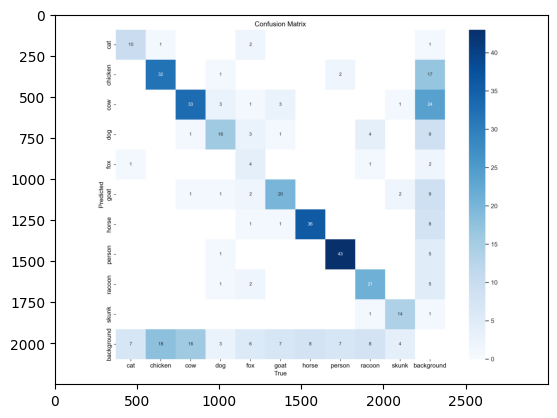

In [37]:
img = cv2.imread("./runs/detect/train2/confusion_matrix.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

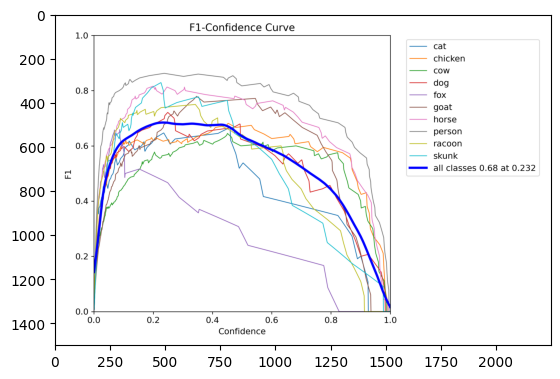

In [38]:
img = cv2.imread("./runs/detect/train2/F1_curve.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

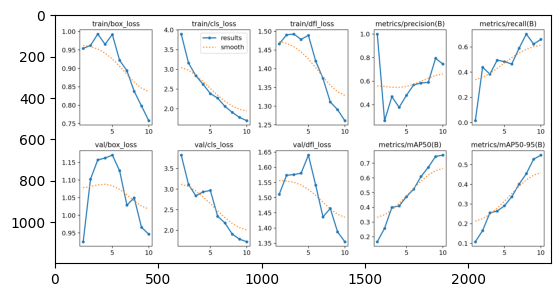

In [40]:
img = cv2.imread("./runs/detect/train/results.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [41]:
infer = YOLO("./runs/detect/train/weights/best.pt") 

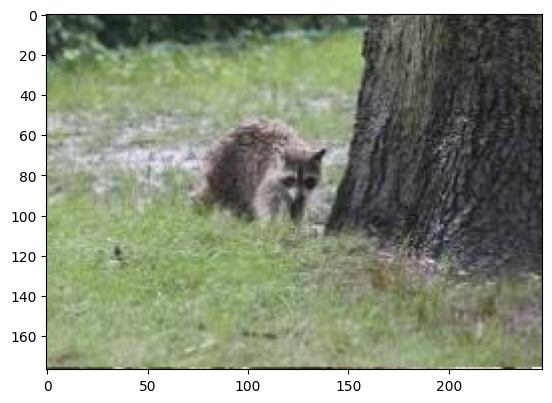

In [42]:
img = cv2.imread("./datasets/test/images/252_jpg.rf.947a6473b4efc6d4653e2c568d91d2b7.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [43]:
results = infer.predict("./datasets/test/images/252_jpg.rf.947a6473b4efc6d4653e2c568d91d2b7.jpg", save=True)


image 1/1 c:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\test\images\252_jpg.rf.947a6473b4efc6d4653e2c568d91d2b7.jpg: 480x640 1 racoon, 112.7ms
Speed: 2.0ms preprocess, 112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict


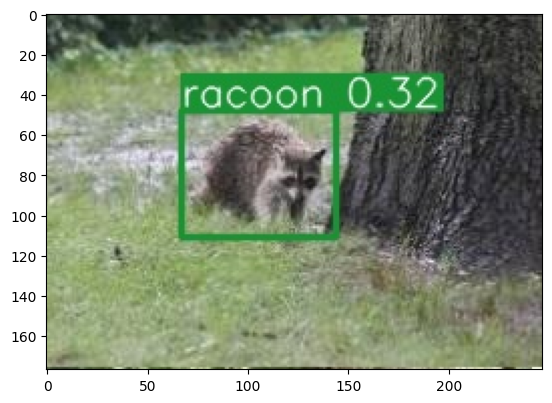

In [63]:
img = cv2.imread("./runs/detect/predict/252_jpg.rf.947a6473b4efc6d4653e2c568d91d2b7.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# python test.py --weights runs/detect/train/weights/best.pt --data dataset/data.yaml --img-size 640

In [45]:
loaded_model = YOLO("./runs/detect/train/weights/best.pt")

In [46]:
metrics = loaded_model.val()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\valid\labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]


                   all        200        351      0.709      0.686      0.756      0.545
                   cat        200         18       0.68      0.591      0.676       0.46
               chicken        200         51      0.595      0.647      0.721      0.474
                   cow        200         51      0.505      0.647      0.638      0.463
                   dog        200         26      0.618      0.846      0.715      0.572
                   fox        200         21      0.779      0.336      0.594      0.485
                  goat        200         32      0.626       0.75      0.785      0.564
                 horse        200         44      0.778      0.841      0.853      0.601
                person        200         52       0.88      0.844      0.905       0.64
                racoon        200         35      0.804      0.686      0.787       0.52
                 skunk        200         21      0.827      0.667      0.885      0.675
Speed: 1.2ms preproce

In [47]:
metrics.box.maps

array([    0.45967,     0.47385,     0.46337,     0.57161,     0.48451,     0.56433,     0.60139,     0.63982,     0.52046,     0.67528])

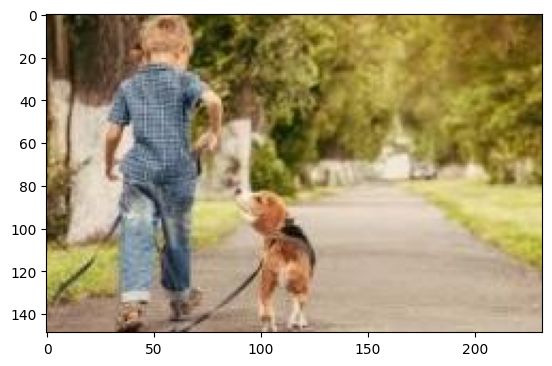

In [60]:
img = cv2.imread("./datasets/test/images/902_jpg.rf.99598073a3e4e74e491f9a47cae5bea8.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [61]:
results = loaded_model.predict("./datasets/test/images/902_jpg.rf.99598073a3e4e74e491f9a47cae5bea8.jpg", save=True)


image 1/1 c:\Users\DT User3\Desktop\AjdinBukvic_VI_Vjezbe13_Zadaca5\datasets\test\images\902_jpg.rf.99598073a3e4e74e491f9a47cae5bea8.jpg: 416x640 1 dog, 1 person, 103.7ms
Speed: 2.0ms preprocess, 103.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


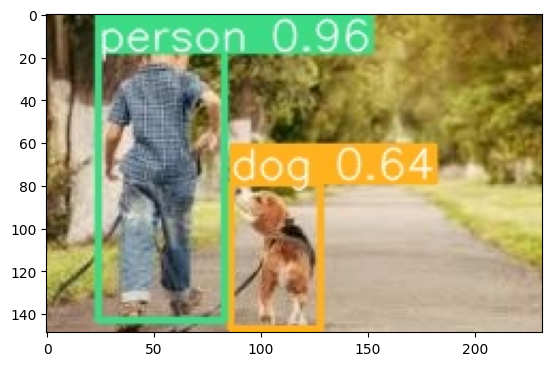

In [64]:
img = cv2.imread("./runs/detect/predict2/902_jpg.rf.99598073a3e4e74e491f9a47cae5bea8.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)